In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Задание №1

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [5]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [6]:
n = zp.size
n

10

In [7]:
X = zp.reshape((n, 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
Y = ks.reshape((n, 1))
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

Без интерсепта:

In [9]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ Y)
B

array([[5.88982042]])

In [10]:
y_hat = B*X
y_hat

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

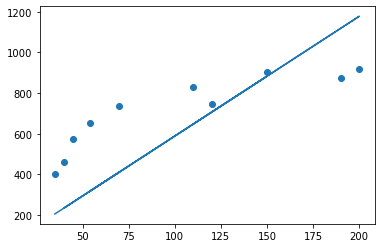

In [11]:
plt.scatter(X, Y)
plt.plot(X, y_hat)

С интерсептом:

In [12]:
X_wo = np.hstack([np.ones((n, 1)), X])
X_wo

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [13]:
B_int = np.dot(np.linalg.inv(np.dot(X_wo.T, X_wo)), X_wo.T @ Y)
B_int

array([[444.17735732],
       [  2.62053888]])

In [14]:
y_hat = B_int[0] + B_int[1]*zp
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

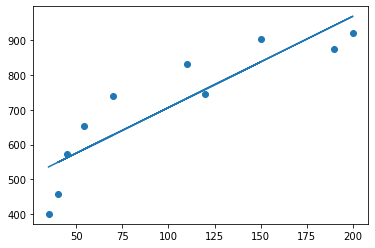

In [15]:
plt.scatter(X, Y)
plt.plot(X, y_hat)

# Задание №2

### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
def mse_1(B1, ks=ks, zp=zp, n=n):
    return np.sum((B1*zp-ks)**2)/n

In [17]:
alpha = 1e-6
alpha

1e-06

In [18]:
B1 = 1.0

In [19]:
for i in range(1000):
    if i%100 == 0:
        print(f"Iteration: {i}, B1={B1}, mse={mse_1(B1)}")
    B1 -= alpha*(2/n)*np.sum((B1*zp - ks)*zp) 

Iteration: 0, B1=1.0, mse=385920.1
Iteration: 100, B1=5.590677957883647, mse=57749.67417388353
Iteration: 200, B1=5.871519909064434, mse=56521.47231898967
Iteration: 300, B1=5.888700857557583, mse=56516.875683590326
Iteration: 400, B1=5.88975192912963, mse=56516.858480345676
Iteration: 500, B1=5.889816230087751, mse=56516.858415961266
Iteration: 600, B1=5.889820163800094, mse=56516.85841572032
Iteration: 700, B1=5.889820404451138, mse=56516.85841571941
Iteration: 800, B1=5.889820419173345, mse=56516.85841571941
Iteration: 900, B1=5.889820420074001, mse=56516.85841571941


# Задание №3

### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [20]:
def mse_2(B0, B1, ks=ks, zp=zp, n=n):
    return np.sum((B0 + B1*zp - ks)**2)/n

In [34]:
alpha = 1e-6
alpha_2 = 1

In [35]:
B0 = 0
B1 = 1.0

In [36]:
for i in range(2000):
    if i%100 == 0:
        print(f"Iteration: {i}, B0={B0}, B1={B1}, mse={mse_2(B0, B1)}")
    B0 -= alpha_2*(2/n)*np.sum((B0 + B1*zp - ks)) 
    B1 -= alpha*(2/n)*np.sum((B0 + B1*zp - ks)*zp) 

Iteration: 0, B0=0, B1=1.0, mse=385920.1
Iteration: 100, B0=452.00818914272713, B1=1.799743054316999, mse=14509.611477151819
Iteration: 200, B0=476.17868357676815, B1=2.2136185597181095, mse=7134.82609738574
Iteration: 300, B0=463.4286208050165, B1=2.4198667884392617, mse=6612.344031076626
Iteration: 400, B0=454.08893771361613, B1=2.5217090633303614, mse=6504.559562227909
Iteration: 500, B0=449.11058775342923, B1=2.571882069001257, mse=6478.687710996203
Iteration: 600, B0=446.612570020651, B1=2.5965857318602885, mse=6472.419303322223
Iteration: 700, B0=445.37698266811407, B1=2.6087472925271737, mse=6470.900117151803
Iteration: 800, B0=444.76800495746375, B1=2.6147341827997908, mse=6470.531955662105
Iteration: 900, B0=444.4681304784994, B1=2.6176813803988135, mse=6470.442737067924
Iteration: 1000, B0=444.32049888910046, B1=2.6191322092826517, mse=6470.42111637804
Iteration: 1100, B0=444.2478223446824, B1=2.6198464142635416, mse=6470.4158769607875
Iteration: 1200, B0=444.21204542223006, 